## Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from lib_file import lib_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.utils import resample

## Data Loading

In [2]:
os.listdir("input")

['data.csv']

In [3]:
data=pd.read_csv("input/data.csv")

In [4]:
data.head(10)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,label
0,447,826,12,157,470,385,113,2824,210.28,384.45,...,8441,0.00,1726654.57,80843.08,3021,5420,609,155,3442,Y
1,0,211,0,0,128,104,14,0,0.00,0.00,...,0,0.00,0.00,0.00,0,0,0,0,1129,Y
2,164,485,10,58,268,219,39,1588,202.98,213.53,...,4828,0.00,514156.64,43342.31,1730,3172,407,102,1824,Y
3,37,29,8,42,19,19,6,133,108.14,46.32,...,685,0.02,12891.31,5009.32,295,390,121,38,222,Y
4,11,405,0,17,404,2,1,814,101.20,206.01,...,2033,0.00,238607.05,20848.47,813,1220,811,411,844,Y
5,106,240,7,344,127,105,33,952,218.17,215.17,...,5669,0.00,561159.25,46943.69,2301,3368,262,49,1411,Y
6,101,464,11,75,263,256,140,1339,106.50,337.36,...,4308,0.00,673377.60,35928.07,1556,2752,226,98,1532,Y
7,67,187,4,1,94,63,27,391,233.07,58.04,...,1780,0.02,43621.22,13527.84,718,1062,167,27,466,Y
8,105,344,9,40,207,171,58,1124,122.60,269.46,...,3848,0.00,494537.33,33034.94,1432,2416,279,105,1280,Y
9,0,83,0,0,42,16,27,0,0.00,0.00,...,0,0.00,0.00,0.00,0,0,0,0,186,Y


## Data Preprocessing

In [5]:
print(len(data))

10878


In [6]:
print(data.isnull().sum())

LOC_BLANK                0
BRANCH_COUNT             0
LOC_CODE_AND_COMMENT     0
LOC_COMMENTS             0
CYCLOMATIC_COMPLEXITY    0
DESIGN_COMPLEXITY        0
ESSENTIAL_COMPLEXITY     0
LOC_EXECUTABLE           0
HALSTEAD_CONTENT         0
HALSTEAD_DIFFICULTY      0
HALSTEAD_EFFORT          0
HALSTEAD_ERROR_EST       0
HALSTEAD_LENGTH          0
HALSTEAD_LEVEL           0
HALSTEAD_PROG_TIME       0
HALSTEAD_VOLUME          0
NUM_OPERANDS             0
NUM_OPERATORS            0
NUM_UNIQUE_OPERANDS      0
NUM_UNIQUE_OPERATORS     0
LOC_TOTAL                0
label                    0
dtype: int64


In [7]:
print(data["label"].unique())

['Y' 'N']


In [8]:
yes=data[data["label"]=="Y"]
no=data[data["label"]=="N"]

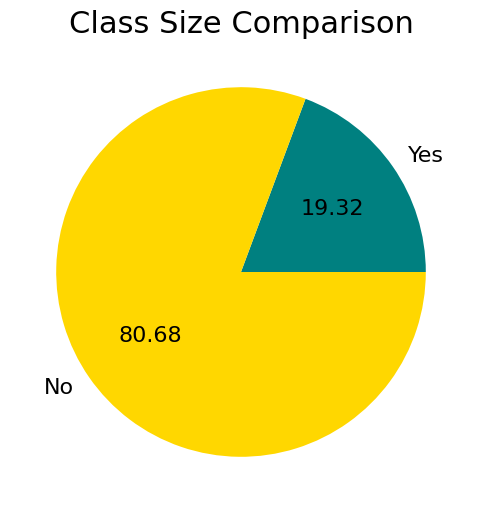

In [9]:
plt.figure(figsize=(8,6))
plt.rcParams["font.size"]=16
chart_data=[len(yes),len(no)]
labels=["Yes","No"]
colors=["teal","gold"]
plt.pie(x=chart_data,labels=labels,colors=colors,autopct="%.2f")
plt.title("Class Size Comparison",fontsize=22)
plt.show()

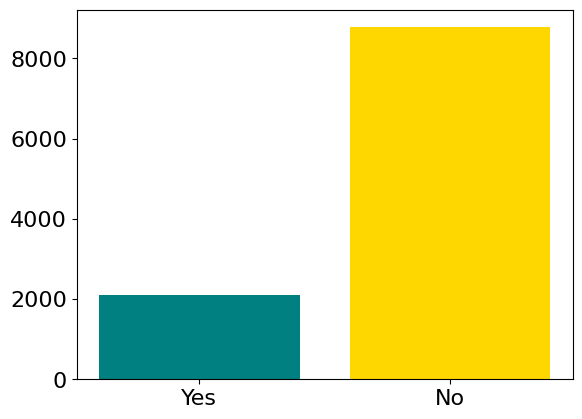

In [10]:
plt.bar(height=chart_data,x=labels,color=colors)
plt.show()

In [11]:
print(len(data.columns))

22


In [12]:
from sklearn import preprocessing

In [13]:
labelencoder=preprocessing.LabelEncoder()

In [14]:
data["label"]=labelencoder.fit_transform(data["label"])

In [15]:
data["label"].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: label, dtype: int32

In [16]:
X=data.drop("label",axis=1)
y=data["label"]

## Finding Important Features

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
ETC=ExtraTreesClassifier()

In [19]:
ETC_model=ETC.fit(X,y)

In [20]:
print(ETC_model.feature_importances_)

[0.05267552 0.05326109 0.0252981  0.03815346 0.04945664 0.06068916
 0.04521799 0.0496736  0.04636237 0.04115874 0.04091829 0.03723176
 0.04229541 0.03746752 0.04022098 0.04466415 0.04431184 0.04445247
 0.04762695 0.04553776 0.11332619]


In [21]:
importants=ETC_model.feature_importances_

In [22]:
print(len(importants))

21


In [23]:
mean_value=importants.mean()

In [24]:
print(mean_value)

0.047619047619047616


In [25]:
col_name = list(data.columns)

col_name = col_name[:-1]

im_value = []
im_col = []
col_n = []
for i,j in enumerate(importants):
    if j >= mean_value:
        im_value.append(j)
        col_n.append(col_name[i])
        print(col_name[i])
        im_col.append(i)

LOC_BLANK
BRANCH_COUNT
CYCLOMATIC_COMPLEXITY
DESIGN_COMPLEXITY
LOC_EXECUTABLE
NUM_UNIQUE_OPERANDS
LOC_TOTAL


<AxesSubplot:>

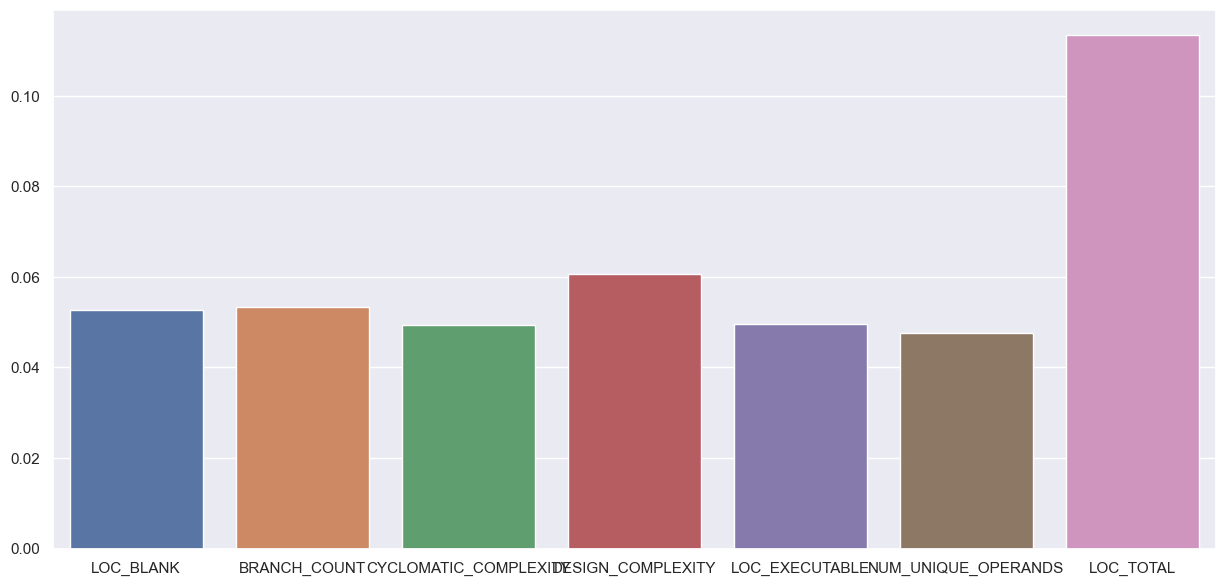

In [26]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x=col_n, y=im_value)

## Taking Important Features

In [27]:
df = data[col_n]
df['label'] = y.values.ravel()
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,LOC_BLANK,BRANCH_COUNT,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,LOC_EXECUTABLE,NUM_UNIQUE_OPERANDS,LOC_TOTAL,label
0,4,3,2,2,16,11,23,0
1,6,5,4,4,31,16,39,1
2,0,3,2,2,0,0,50,1
3,0,1,1,1,2,2,4,0
4,3,13,7,6,16,11,24,0


In [28]:
df.shape

(10878, 8)

In [29]:
oversampled = []

for label in df['label'].unique():
    label_df = df.loc[df['label'] == label]
    resampled = resample(label_df, n_samples=15000)
    oversampled.append(resampled)
    
df = pd.concat(objs=oversampled, ignore_index=True)

In [30]:
df.shape

(30000, 8)

In [31]:
yes=df[df["label"]==1]
no=df[df["label"]==0]

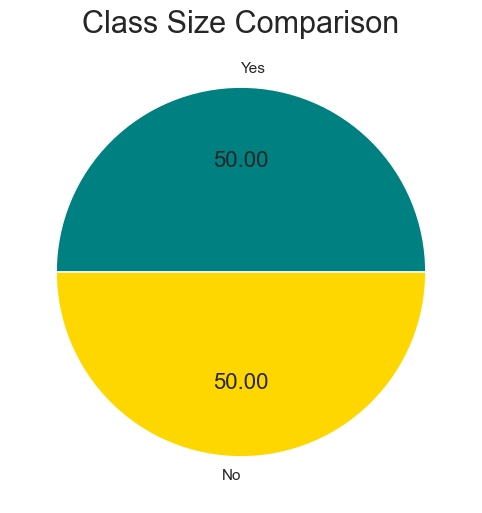

In [32]:
plt.figure(figsize=(8,6))
plt.rcParams["font.size"]=16
chart_data=[len(yes),len(no)]
labels=["Yes","No"]
colors=["teal","gold"]
plt.pie(x=chart_data,labels=labels,colors=colors,autopct="%.2f")
plt.title("Class Size Comparison",fontsize=22)
plt.show()

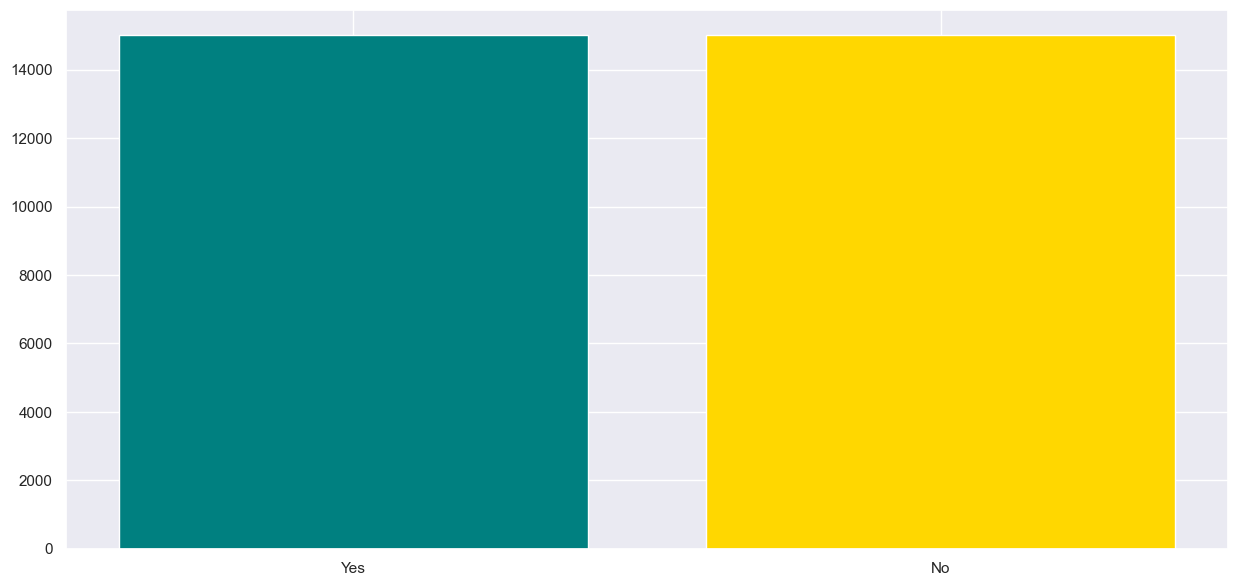

In [33]:
plt.bar(height=chart_data,x=labels,color=colors)
plt.show()

In [34]:
X=df.drop("label",axis=1)
y=df["label"]

In [35]:
X.head(10)

,LOC_BLANK,BRANCH_COUNT,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,LOC_EXECUTABLE,NUM_UNIQUE_OPERANDS,LOC_TOTAL
0,3,1,1,1,10,11,15
1,1,3,2,2,8,6,11
2,0,1,1,1,2,2,4
3,7,21,11,4,26,22,36
4,2,9,5,1,13,6,18
5,5,5,3,2,16,19,24
6,3,5,3,3,20,16,25
7,0,3,2,1,0,0,16
8,0,3,2,2,0,0,15
9,0,7,4,2,0,0,23


In [36]:
X.shape

(30000, 7)

## Data Splitting

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24000, 7) (6000, 7) (24000,) (6000,)


## Model-1 RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=1, min_samples_split=50, min_samples_leaf=50)

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=50, min_samples_split=50,
                       n_estimators=1)

In [42]:
predictions = rfc.predict(X_test)

In [43]:
RF_accuracy = accuracy_score(y_true=y_test, y_pred= predictions)
print("Overall accuracy of RF model using test-set is :" ,(RF_accuracy*100))

Overall accuracy of RF model using test-set is : 69.6


## Result Analysis

### Classification Report

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      3000
           1       0.69      0.71      0.70      3000

    accuracy                           0.70      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.70      0.70      0.70      6000



### Confusion Matrix

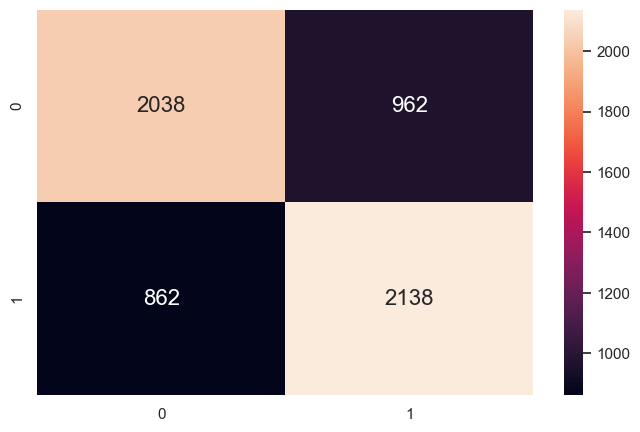

In [45]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt='.4g')
plt.show()

## ANN (Artificial Neural Network)

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
# y=to_categorical(y=y)
y_train=to_categorical(y=y_train)
y_test=to_categorical(y=y_test)

In [48]:
print(y_train)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [49]:
# importing the libraries for deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [50]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [51]:
input_dim = X_train.shape[1]
#Rectified Linear Unit
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'] )

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              66560     
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [54]:
history=model.fit(X_train.values, y_train, epochs=200, batch_size=200, validation_data=(X_test.values,y_test))

Epoch 1/200
120/120 [==============================] - 4s 22ms/step - loss: 0.6431 - accuracy: 0.6535 - val_loss: 0.6411 - val_accuracy: 0.6482
Epoch 2/200
120/120 [==============================] - 2s 18ms/step - loss: 0.6254 - accuracy: 0.6594 - val_loss: 0.6273 - val_accuracy: 0.6520
Epoch 3/200
120/120 [==============================] - 2s 17ms/step - loss: 0.6182 - accuracy: 0.6638 - val_loss: 0.6192 - val_accuracy: 0.6527
Epoch 4/200
120/120 [==============================] - 2s 18ms/step - loss: 0.6166 - accuracy: 0.6627 - val_loss: 0.6163 - val_accuracy: 0.6563
Epoch 5/200
120/120 [==============================] - 2s 18ms/step - loss: 0.6148 - accuracy: 0.6650 - val_loss: 0.6231 - val_accuracy: 0.6483
Epoch 6/200
120/120 [==============================] - 2s 18ms/step - loss: 0.6121 - accuracy: 0.6673 - val_loss: 0.6172 - val_accuracy: 0.6543
Epoch 7/200
120/120 [==============================] - 2s 19ms/step - loss: 0.6067 - accuracy: 0.6686 - val_loss: 0.6168 - val_accuracy:

120/120 [==============================] - 2s 16ms/step - loss: 0.3185 - accuracy: 0.8534 - val_loss: 0.3508 - val_accuracy: 0.8427
Epoch 114/200
120/120 [==============================] - 2s 16ms/step - loss: 0.3106 - accuracy: 0.8594 - val_loss: 0.3673 - val_accuracy: 0.8313
Epoch 115/200
120/120 [==============================] - 2s 16ms/step - loss: 0.3161 - accuracy: 0.8535 - val_loss: 0.3457 - val_accuracy: 0.8460
Epoch 116/200
120/120 [==============================] - 2s 16ms/step - loss: 0.3172 - accuracy: 0.8530 - val_loss: 0.3533 - val_accuracy: 0.8405
Epoch 117/200
120/120 [==============================] - 2s 16ms/step - loss: 0.3067 - accuracy: 0.8577 - val_loss: 0.3591 - val_accuracy: 0.8393
Epoch 118/200
120/120 [==============================] - 2s 16ms/step - loss: 0.3013 - accuracy: 0.8602 - val_loss: 0.3458 - val_accuracy: 0.8460
Epoch 119/200
120/120 [==============================] - 2s 15ms/step - loss: 0.3114 - accuracy: 0.8573 - val_loss: 0.3338 - val_accuracy:

## Accuracy and Loss Plot-Graphs

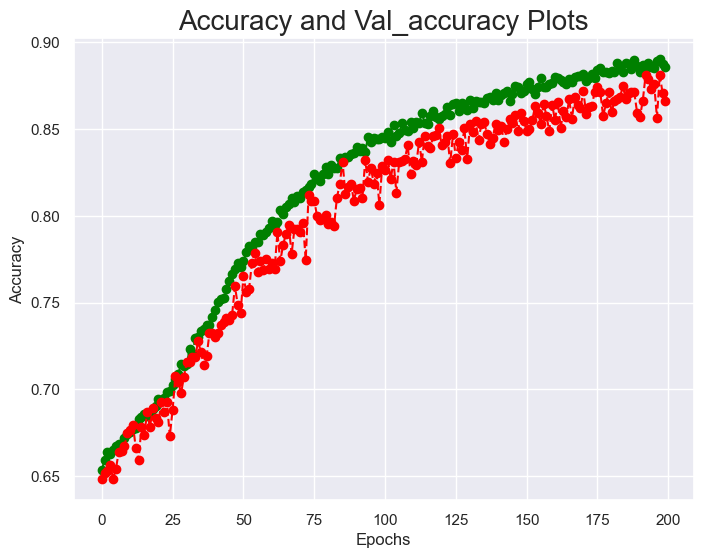

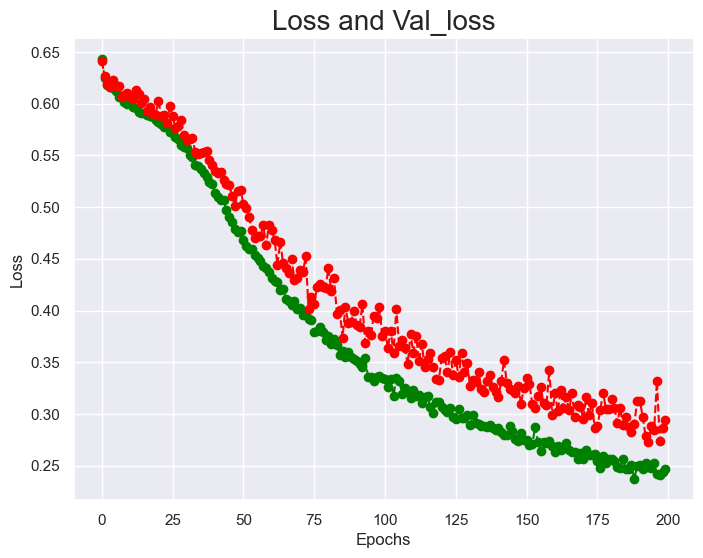

In [55]:
plt.figure(figsize=(8,6))
plt.plot(history.history["accuracy"],color='green', marker='o', linestyle='dashed')
plt.plot(history.history["val_accuracy"],color='red', marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy and Val_accuracy Plots",fontsize=20)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history["loss"],color='green', marker='o', linestyle='dashed')
plt.plot(history.history["val_loss"],color='red', marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss and Val_loss",fontsize=20)
plt.show()

In [56]:
Accuracy=model.evaluate(x=X_test,y=y_test,batch_size=10)
print("Ann model accuracy is:",Accuracy[1])

600/600 [==============================] - 2s 3ms/step - loss: 0.2945 - accuracy: 0.8660
Ann model accuracy is: 0.8659999966621399


In [57]:
Ann_pred=model.predict(X_test,batch_size=10,verbose=1)

600/600 [==============================] - 1s 2ms/step


In [58]:
ann_predict=[]
for i in range(0,len(Ann_pred)):
    ann_predict.append(int(np.argmax(Ann_pred[i])))
print(len(ann_predict))

6000


In [59]:
print(y_test)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [60]:
y_true=[]
for i in range(0,len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
print(len(y_true))

6000


## Result Analysis

### Classification Report

In [61]:
print(classification_report(y_true=y_true,y_pred=ann_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3000
           1       0.89      0.84      0.86      3000

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



### Confusion Matrix

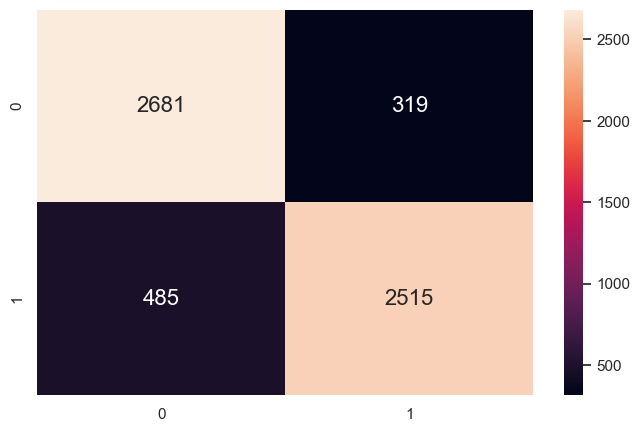

In [62]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true=y_true,y_pred=ann_predict),annot=True,fmt='.4g')
plt.show()

## Model Comparision

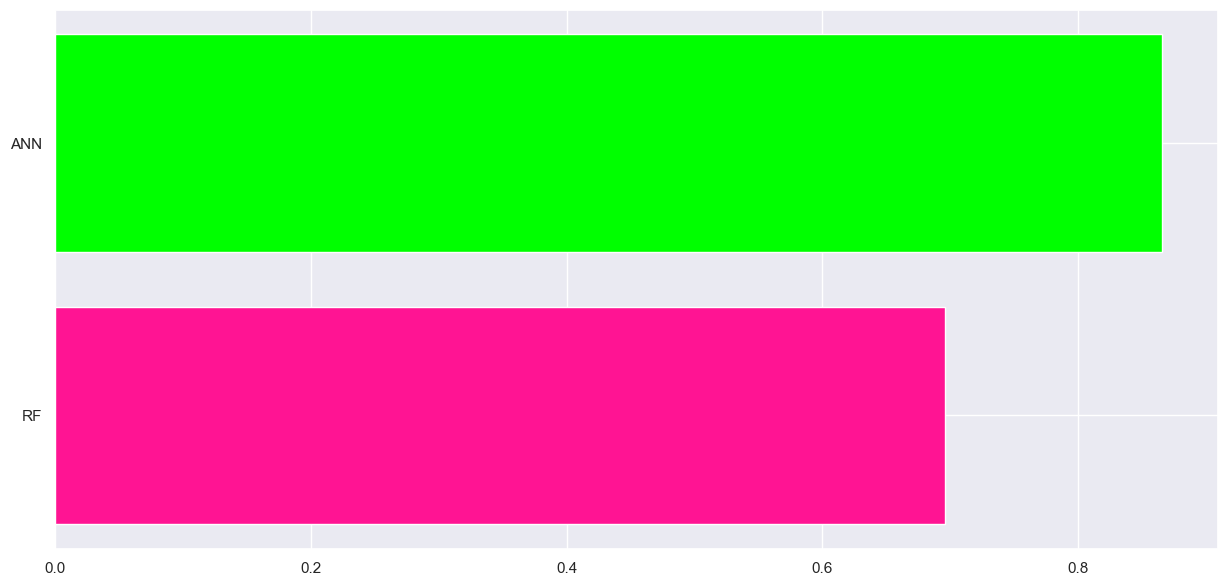

In [63]:
Accuracy_data=[RF_accuracy,Accuracy[1]]
labels=["RF","ANN"]
colors=["deeppink","lime"]
plt.barh(y=labels,width=Accuracy_data,color=colors)
plt.show()

## Thank You